In [177]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import locale 
locale.setlocale(locale.LC_ALL, "") 

'Russian_Russia.1251'

In [134]:
# читаем данные исходной таблицы
data = pd.read_excel('data.xlsx')
data.head()

,year,month,traffic_source,detail_traffic,visits_in_history,gender,age,visits,users,rejections
0,2020,январь,Переходы по рекламе,Яндекс: Директ,1,мужской,55 лет и старше,491,491,0.219959
1,2020,январь,Переходы по рекламе,Google Ads,1,женский,55 лет и старше,310,310,0.803226
2,2020,январь,Переходы по рекламе,Яндекс: Директ,1,мужской,45-54 года,281,281,0.220641
3,2020,январь,Переходы по рекламе,Яндекс: Директ,1,мужской,55 лет и старше,265,265,0.354717
4,2020,январь,Переходы по рекламе,Яндекс: Директ,1,мужской,35‑44 года,248,248,0.358871


In [184]:
def month(month): #поскольку в таблице есть колонки с названием месяца, которые нам понадобятся, переводим в формат datetime

    for line in data.month:
        date = datetime.strptime(line, '%B')
        return date

month(month)


TypeError: strptime() argument 1 must be str, not Timestamp

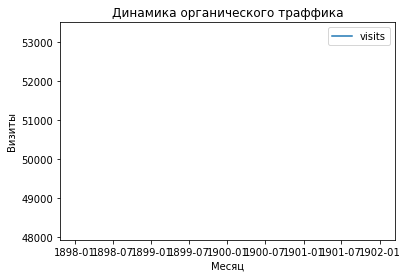

In [185]:
# График: Как изменяется органический трафик по месяцам года
# после перевода данных почему-то перестал отображаться граффик.

data_filter = data[['month', 'traffic_source', 'visits']]
dynamics_by_month = data_filter[(data_filter['traffic_source'] == 'Переходы из поисковых систем')].groupby('month').sum().sort_values('month')
plt.plot(dynamics_by_month.index, dynamics_by_month.visits)
plt.title('Динамика органического траффика')
plt.xlabel('Месяц')
plt.ylabel('Визиты')
plt.legend(dynamics_by_month)


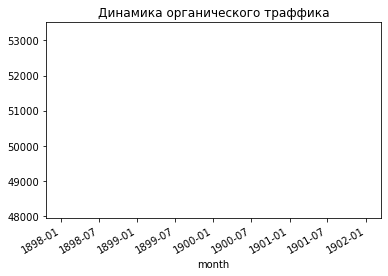

In [186]:
dynamics_by_month['visits'].plot(title='Динамика органического траффика', 
                                        x='Месяц', 
                                        y='Визиты')

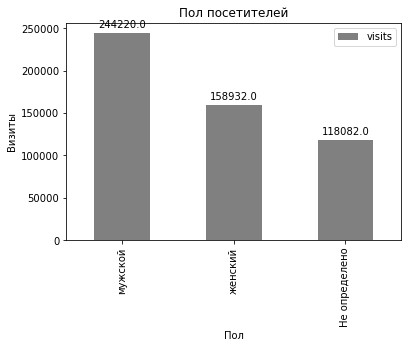

In [52]:
#Столбчатая диарамма - посетители в размрезе пола и возраста
# строим диаграмму по полу посетителей сайта.
gender = data[['gender', 'age', 'visits']].groupby(by='gender').sum().sort_values(by='visits', ascending=False).head()
gender.head()# готовим данные таблицы
bar = gender.plot(kind='bar', color = 'grey') # строим диаграмму
plt.title('Пол посетителей') # делаем подписи
plt.xlabel('Пол')
plt.ylabel('Визиты') 
plt.legend(gender)
for p in bar.patches:# подписываем столбцы
    bar.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

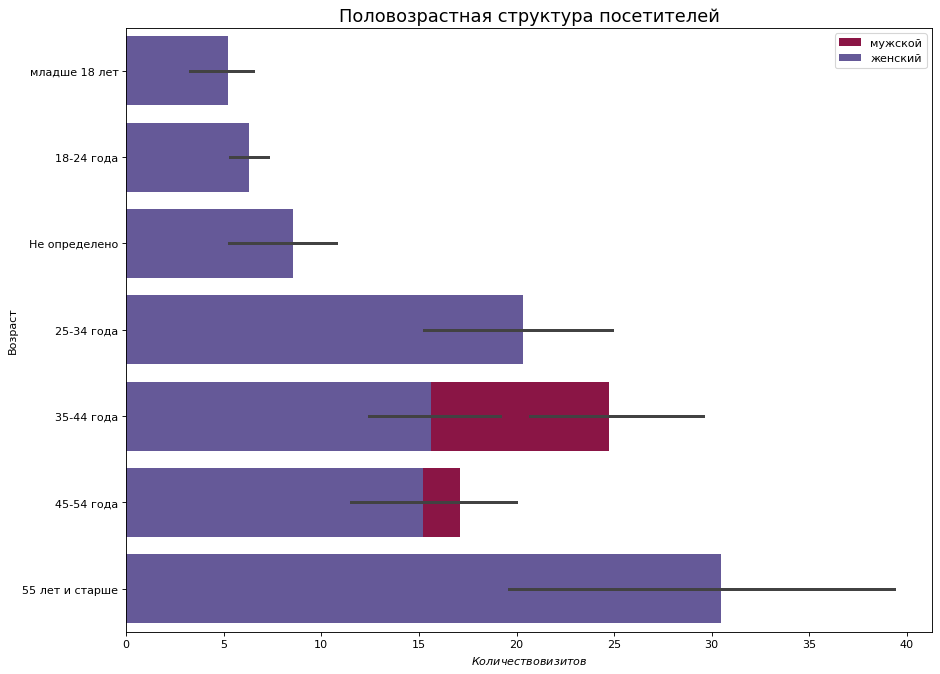

In [69]:
# Пирамида: половозрастная структура посетителей сайта:
# почему-то пирамида не получилась, данные по мужской аудитории не совпадают с таблицей
data = pd.read_excel('data.xlsx')
gender = data[['gender', 'age', 'visits']]
gender_ = gender[ (gender['gender']=='женский') | (gender['gender']=='мужской') ]

# делаем пирамиду
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'gender'
order_of_bars = gender_.age.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(gender_[group_col].unique())-1)) for i in range(len(gender_[group_col].unique()))]

for c, group in zip(colors, gender_[group_col].unique()):
    sns.barplot(x='visits', y='age', data=gender_.loc[gender_[group_col]==group, :], order=order_of_bars, color=c, label=group)

# украшения    
plt.xlabel("$Количество визитов$")
plt.ylabel("Возраст")
plt.yticks(fontsize=10)
plt.title("Половозрастная структура посетителей", fontsize=16)
plt.legend()
plt.show()

Text(0, 0.5, 'Запросы')

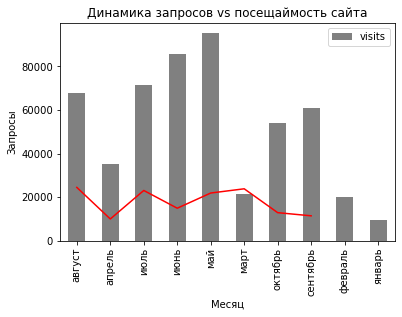

In [128]:
#Наложение 2х таблиц: отношение роста запросов с посещаймостью сайта

data = pd.read_excel('data.xlsx')# читаем данные первой таблицы и строим диаграмму
x = data[['year', 'month', 'visits']].groupby(['year', 'month']).sum().reset_index()
x_ = x[['month', 'visits']].set_index('month')
x_.plot(kind='bar', color = 'grey')
plt.title('Динамика запросов vs посещаймость сайта')
plt.xlabel('Месяц')
plt.ylabel('Визиты')

requests = pd.read_excel('wordstat.xlsx')# читаем данные второй таблицы и строим график
y = requests[(requests['year']==2020)].groupby(['year', 'month']).sum().reset_index()
y_ = y.filter(items = ['month', 'requests']).set_index('month')
plt.plot(y_.index, y_.requests, color = 'red')
plt.xlabel('Месяц')
plt.ylabel('Запросы')